# Digit Recognizer

The objective is recognize digits in images and classify them.

Link: <a href="https://www.kaggle.com/c/digit-recognizer">Kaggle challenge</a>

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 

### Creating functions

In [2]:
# This function will show at digit
def show_image(arr, label):
    pixels = np.reshape(arr, (28, 28))
    plt.imshow(pixels)
    plt.title("Digit {}".format(label))
    return plt

In [3]:
# This function contains the train method and predict of tensorflow
def cnn_model(features, labels, mode):
    # Input Layer
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=10)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])
    }
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

### Loading the training and test data set

In [4]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

The image has 28 pixels of height and 28 pixels of width. The area of a square is the multiplication of height and width.

In [5]:
test.shape

(28000, 784)

<module 'matplotlib.pyplot' from 'c:\\users\\msgru\\anaconda2\\envs\\tensorflow-py35\\lib\\site-packages\\matplotlib\\pyplot.py'>

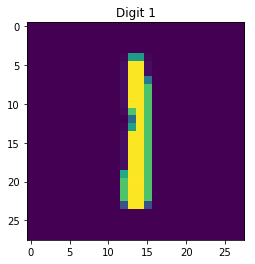

In [6]:
label = train.iloc[:,0]
images = train.iloc[:,1:]

# show digit 1
show_image(images.iloc[2,:].values, label.iloc[2])

In [7]:
# Defining label and images on dataset
images = images.values.astype(float)

label_test = test.iloc[:,0]
images_test = test.iloc[:,1:].values.astype(float)

### Training the model

In [8]:
###################################
####### Create the Estimator ######
mnist_classifier = tf.estimator.Estimator(
    model_fn=cnn_model, model_dir="C:\\Users\\msgru\\Documents\\Git\\Outros\\Tensorflow\\Tutorial1\\Digit Recognizer\\mnist_convnet_model")

##########################################
###### Set up logging for predictions
###### Log the values in the "Softmax" tensor with label "probabilities"
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

##############################
####### Train the model ######
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": images},
    y=label,
    batch_size=100,
    num_epochs=None,
    shuffle=True)

mnist_classifier.train(
    input_fn=train_input_fn,
    steps=500,
    hooks=[logging_hook])
###############################

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_save_checkpoints_secs': 600, '_keep_checkpoint_max': 5, '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001B349E3DFD0>, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_save_summary_steps': 100, '_num_ps_replicas': 0, '_num_worker_replicas': 1, '_train_distribute': None, '_save_checkpoints_steps': None, '_log_step_count_steps': 100, '_is_chief': True, '_task_type': 'worker', '_service': None, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_model_dir': 'C:\\Users\\msgru\\Documents\\Git\\Outros\\Tensorflow\\Tutorial1\\Digit Recognizer\\mnist_convnet_model'}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\msgru\Documents\Git\Outros\Tensorflow\Tutoria

  0.99960404 0.00000001 0.00000036 0.00000003]]
INFO:tensorflow:step = 1501, loss = 0.13785037398338318
INFO:tensorflow:probabilities = [[0.00000007 0.00000001 0.0000031  0.00004026 0.         0.00000081
  0.         0.99989674 0.00000155 0.00005746]
 [0.00000001 0.         0.         0.00000149 0.00000246 0.00000142
  0.00000002 0.0000218  0.00000054 0.99997225]
 [0.00000001 0.         0.00000006 0.00000504 0.         0.
  0.         0.99998929 0.00000023 0.00000537]
 [0.         0.00000115 0.99999694 0.00000182 0.00000006 0.
  0.00000003 0.         0.         0.        ]
 [0.00000006 0.00000002 0.         0.00000023 0.00059434 0.00000004
  0.         0.00002408 0.00000864 0.99937259]
 [0.00000004 0.         0.00000025 0.         0.         0.
  0.         0.99999967 0.00000002 0.00000003]
 [0.         0.00000005 0.00000015 0.99999889 0.         0.00000015
  0.         0.00000001 0.00000005 0.00000071]
 [0.00001739 0.00000135 0.00000132 0.00000843 0.00892566 0.0000027
  0.00000458 0.0

INFO:tensorflow:global_step/sec: 1.67741
INFO:tensorflow:probabilities = [[0.15599787 0.0039997  0.0012148  0.01358289 0.0001027  0.42557541
  0.00003232 0.0021517  0.37289708 0.02444553]
 [0.0000012  0.99936367 0.00003748 0.0000002  0.00000198 0.00000046
  0.00000073 0.00001149 0.00058125 0.00000155]
 [0.00041457 0.00001491 0.42207013 0.03291016 0.00001569 0.00004348
  0.00000551 0.00121695 0.53909971 0.00420889]
 [0.00295257 0.00000386 0.00001509 0.00000126 0.00010064 0.01858911
  0.97797576 0.00000009 0.00034552 0.0000161 ]
 [0.         0.00000054 0.00004721 0.00001093 0.         0.
  0.         0.999939   0.00000077 0.00000156]
 [0.00000006 0.         0.99999615 0.00000115 0.00000089 0.00000005
  0.00000166 0.         0.00000003 0.        ]
 [0.0000033  0.00003158 0.00000173 0.00002024 0.00037323 0.00000243
  0.00001529 0.00037507 0.00009275 0.99908437]
 [0.         0.00000006 0.00000404 0.00000349 0.00000005 0.00000034
  0.         0.99998958 0.00000001 0.00000243]
 [0.00000006 0.

INFO:tensorflow:step = 1601, loss = 0.12355244159698486 (59.621 sec)
INFO:tensorflow:probabilities = [[0.90292026 0.00000595 0.00002809 0.00000409 0.00000123 0.00024484
  0.05837505 0.00077581 0.03760116 0.00004353]
 [0.99999369 0.         0.00000341 0.00000005 0.         0.00000281
  0.00000002 0.         0.         0.00000001]
 [0.0000208  0.00000876 0.00096146 0.0000168  0.00011908 0.00004138
  0.00000446 0.99862742 0.00005682 0.00014302]
 [0.99999969 0.         0.00000003 0.         0.         0.
  0.00000014 0.         0.         0.00000013]
 [0.00001462 0.00008454 0.00000028 0.00000143 0.99976431 0.00000444
  0.00000606 0.00011222 0.00000125 0.00001085]
 [0.         0.         0.00000442 0.99993206 0.         0.0000038
  0.         0.00004832 0.0000021  0.0000093 ]
 [0.00005467 0.00000144 0.79978989 0.17129615 0.0000016  0.00000154
  0.00000001 0.00237154 0.0255702  0.00091296]
 [0.00030911 0.00001812 0.00010252 0.01262803 0.98494716 0.00101218
  0.00004844 0.00044392 0.00001449 

INFO:tensorflow:global_step/sec: 1.85518
INFO:tensorflow:probabilities = [[0.00000001 0.         0.00000001 0.99998422 0.         0.00000711
  0.         0.00000525 0.         0.0000034 ]
 [0.00012536 0.         0.00000194 0.00000022 0.00003358 0.00000263
  0.00000445 0.00001857 0.00000244 0.9998108 ]
 [0.84591939 0.00000329 0.01324296 0.00211026 0.00002112 0.00005171
  0.13857218 0.00005676 0.00001214 0.00001019]
 [0.00001357 0.99442259 0.00073005 0.00002439 0.00124376 0.00000212
  0.00001023 0.00339539 0.00014422 0.00001367]
 [0.0000004  0.00000018 0.00000027 0.         0.00000023 0.00007789
  0.99992038 0.         0.00000057 0.00000009]
 [0.00000038 0.         0.0000001  0.         0.00000002 0.00000488
  0.99999461 0.         0.00000001 0.        ]
 [0.00000018 0.00000293 0.         0.00181183 0.00001221 0.99743256
  0.00000058 0.00000001 0.00012111 0.00061858]
 [0.         0.         0.0000002  0.00001538 0.         0.99990693
  0.         0.         0.00002602 0.00005147]
 [0.000

INFO:tensorflow:step = 1701, loss = 0.11076220124959946 (53.904 sec)
INFO:tensorflow:probabilities = [[0.00000543 0.00000001 0.00000032 0.00000143 0.00000589 0.00000038
  0.00000252 0.99991623 0.00000028 0.00006749]
 [0.00000039 0.00000001 0.00023951 0.0000034  0.00000142 0.00035204
  0.00005275 0.0000104  0.99870188 0.00063819]
 [0.00000086 0.00000008 0.00000233 0.0000355  0.00050233 0.00000012
  0.         0.00015997 0.00015707 0.99914174]
 [0.00000015 0.         0.00000019 0.00000132 0.00001064 0.00000017
  0.00000004 0.00005314 0.00000624 0.9999281 ]
 [0.00001255 0.99952814 0.0001055  0.00000129 0.00002303 0.00001783
  0.00007186 0.00000099 0.00023719 0.00000163]
 [0.00001378 0.75962322 0.00083787 0.00125776 0.00017164 0.00004718
  0.00000043 0.23243701 0.0021284  0.00348271]
 [0.0000008  0.00000015 0.00000019 0.00000001 0.00001324 0.00189414
  0.99776612 0.         0.0000603  0.00026503]
 [0.0000004  0.00000338 0.00000992 0.00002017 0.00001876 0.00000356
  0.00000002 0.08597996 0.

INFO:tensorflow:global_step/sec: 1.94296
INFO:tensorflow:probabilities = [[0.00000584 0.00018575 0.9952774  0.00010146 0.00000078 0.00000042
  0.00000406 0.00078076 0.00361632 0.0000272 ]
 [0.99998564 0.         0.00000535 0.         0.         0.00000123
  0.00000633 0.         0.00000094 0.0000005 ]
 [0.00008233 0.99278341 0.0005276  0.00056117 0.00098859 0.00000701
  0.0000801  0.00419319 0.00041995 0.00035665]
 [0.00000028 0.00000052 0.         0.00000005 0.99998276 0.00000023
  0.00000004 0.00000286 0.00000002 0.00001323]
 [0.00000001 0.00000003 0.99989523 0.00008429 0.00000007 0.00000023
  0.00000006 0.0000001  0.00001998 0.        ]
 [0.00000555 0.00001091 0.00000062 0.00000025 0.00001061 0.00001433
  0.0000002  0.00000256 0.99995251 0.00000247]
 [0.99738847 0.00000005 0.00000948 0.00000725 0.00000065 0.00000008
  0.0013444  0.00000199 0.00002288 0.00122474]
 [0.         0.00000001 0.00000002 0.99999685 0.         0.00000108
  0.         0.00000001 0.00000204 0.        ]
 [0.999

INFO:tensorflow:step = 1801, loss = 0.04653482884168625 (51.484 sec)
INFO:tensorflow:probabilities = [[0.00083196 0.00000001 0.0000073  0.         0.99915665 0.00000105
  0.         0.00000115 0.00000004 0.00000184]
 [0.0000806  0.00000007 0.00000002 0.00000008 0.00000009 0.00003282
  0.99988422 0.00000001 0.00000117 0.00000091]
 [0.00000007 0.00000007 0.00000003 0.0000013  0.00007745 0.00000529
  0.00000001 0.00009874 0.00007192 0.99974513]
 [0.99981874 0.         0.0000001  0.         0.         0.00000163
  0.00000021 0.00000009 0.00000052 0.0001787 ]
 [0.99562782 0.00000001 0.00000137 0.0000023  0.         0.0001948
  0.00000537 0.00000002 0.00412578 0.00004253]
 [0.0000127  0.00000018 0.00000108 0.00001876 0.99738468 0.00001951
  0.00000563 0.00244761 0.00002443 0.00008543]
 [0.00011175 0.99326508 0.00004766 0.00001019 0.0008721  0.00031486
  0.00005595 0.00050904 0.00475422 0.00005916]
 [0.00000009 0.         0.00000051 0.00000009 0.         0.
  0.         0.99999838 0.00000001 

INFO:tensorflow:global_step/sec: 2.13952
INFO:tensorflow:probabilities = [[0.00000001 0.         0.00000014 0.00000085 0.         0.
  0.         0.999983   0.00000002 0.00001598]
 [0.         0.99999766 0.00000011 0.         0.00000012 0.00000045
  0.00000101 0.00000002 0.00000061 0.        ]
 [0.00001126 0.00000386 0.00022194 0.00077345 0.00001526 0.00001202
  0.00000207 0.00000258 0.9989516  0.00000595]
 [0.00000002 0.00000024 0.00000013 0.0000104  0.00000001 0.99993394
  0.00000013 0.00000799 0.00004657 0.00000056]
 [0.00020932 0.00000397 0.00001199 0.00000551 0.00000043 0.06688909
  0.00001106 0.00001084 0.92751036 0.00534743]
 [0.99995651 0.00000005 0.00000415 0.0000047  0.00000027 0.00000806
  0.00000283 0.00000179 0.00000117 0.00002047]
 [0.0000379  0.00000081 0.91933805 0.00023134 0.07840616 0.00040289
  0.00054872 0.00081908 0.00005179 0.00016326]
 [0.1772215  0.00000285 0.00062089 0.00000229 0.00014665 0.76774175
  0.00722092 0.00009977 0.00002929 0.04691408]
 [0.00000249 0.

INFO:tensorflow:step = 1901, loss = 0.08890023082494736 (46.724 sec)
INFO:tensorflow:probabilities = [[0.00000011 0.00000103 0.94286735 0.05711529 0.00000017 0.00000134
  0.00000001 0.00000925 0.000004   0.00000145]
 [0.00000392 0.99976926 0.00000001 0.00000003 0.00006971 0.00000007
  0.00015222 0.00000058 0.0000042  0.        ]
 [0.00027861 0.00000016 0.00006545 0.00000002 0.99428542 0.00004046
  0.00155778 0.00180734 0.0008636  0.00110116]
 [0.00000002 0.00000032 0.         0.00000019 0.         0.99997908
  0.00001409 0.         0.00000228 0.00000402]
 [0.00000119 0.00000103 0.00000418 0.00000407 0.         0.99991974
  0.00004235 0.00000001 0.00002648 0.00000095]
 [0.         0.00000006 0.         0.00000063 0.00000045 0.99999701
  0.00000025 0.         0.00000124 0.00000035]
 [0.00000046 0.00000008 0.00000014 0.00000604 0.00001327 0.00000008
  0.00000001 0.99997096 0.0000071  0.00000187]
 [0.00020831 0.00000004 0.00000083 0.99974521 0.00000001 0.00002489
  0.00000001 0.00000242 0.

INFO:tensorflow:Saving checkpoints for 2000 into C:\Users\msgru\Documents\Git\Outros\Tensorflow\Tutorial1\Digit Recognizer\mnist_convnet_model\model.ckpt.
INFO:tensorflow:Loss for final step: 0.1904774308204651.


### Predicting new data on model

In [9]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
  x={"x": test.iloc[:,:].values.astype(float)},
  num_epochs=1,
  shuffle=False)
test_results = mnist_classifier.predict(input_fn=predict_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\msgru\Documents\Git\Outros\Tensorflow\Tutorial1\Digit Recognizer\mnist_convnet_model\model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


<module 'matplotlib.pyplot' from 'c:\\users\\msgru\\anaconda2\\envs\\tensorflow-py35\\lib\\site-packages\\matplotlib\\pyplot.py'>

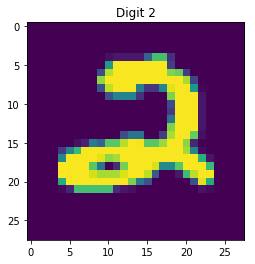

In [15]:
# Selecting the first prediction and showing on screen
results = [res['classes'] for res in test_results]
show_image(test.iloc[0,:].values, results[0])